# Heart Attack
Training a model that can predict whether a person has high chance of heart attack

### Importing the required libraries 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree 
from joblib import dump
%matplotlib inline

### Reading the data and trying to understand it

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object


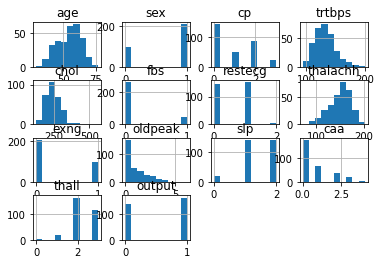

In [2]:
df = pd.read_csv("heartattack.csv")
df.hist()
print(df.dtypes)

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Splitting the Data

In [4]:
x = np.asanyarray(df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']])
y = np.asanyarray(df[['output']])

# Normalizing the data
x = preprocessing.normalize(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1812)

## Training the Model

In [5]:
bestTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
bestTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Evaluation

In [6]:
y_hat = bestTree.predict(x_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_hat))


DecisionTrees's Accuracy:  0.9180327868852459


## Checking other criterion and max_depth for even better result

In [7]:
result = []
criterions = ['entropy', 'gini']
for criterion in criterions:
    for depth in range(1, len(df.columns) + 1): # from 1 till the columns length
        testTree = DecisionTreeClassifier(criterion=criterion, max_depth = depth)
        testTree.fit(x_train,y_train)
        y_hat = testTree.predict(x_test)
        score = metrics.accuracy_score(y_test, y_hat)
        print(f"DecisionTrees's Accuracy with {criterion} and max_depth of {depth}: ", score)
        result.append(score)

print('\n')
print('So, the best possible score is', max(result))

DecisionTrees's Accuracy with entropy and max_depth of 1:  0.7704918032786885
DecisionTrees's Accuracy with entropy and max_depth of 2:  0.8688524590163934
DecisionTrees's Accuracy with entropy and max_depth of 3:  0.8524590163934426
DecisionTrees's Accuracy with entropy and max_depth of 4:  0.9180327868852459
DecisionTrees's Accuracy with entropy and max_depth of 5:  0.8688524590163934
DecisionTrees's Accuracy with entropy and max_depth of 6:  0.819672131147541
DecisionTrees's Accuracy with entropy and max_depth of 7:  0.819672131147541
DecisionTrees's Accuracy with entropy and max_depth of 8:  0.8032786885245902
DecisionTrees's Accuracy with entropy and max_depth of 9:  0.819672131147541
DecisionTrees's Accuracy with entropy and max_depth of 10:  0.7704918032786885
DecisionTrees's Accuracy with entropy and max_depth of 11:  0.8032786885245902
DecisionTrees's Accuracy with entropy and max_depth of 12:  0.8032786885245902
DecisionTrees's Accuracy with entropy and max_depth of 13:  0.80

<hr>

<div id="visualization">
    <h2>Visualization</h2>

Let's visualize the tree

</div>


In [ ]:
dot_data = StringIO()
filename = "heart-attack-tree.png"
featureNames = df.columns[0:13]
out=tree.export_graphviz(bestTree,feature_names=featureNames, out_file=dot_data, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## Saving the model for future use

In [ ]:
dump(bestTree, 'heartattack-model.joblib') 